In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
stat3_cd4_file = '/media/pipkin/Rocket2/T_Cell_ChIP/202012_ChIP/3_peak_annotations/2017_PNAS_Li___STAT3_IL21-CD4_annoDf.csv'
stat3_cd4_df = pd.read_csv(stat3_cd4_file, index_col=0)
stat3_cd4_genes = set([x for x in stat3_cd4_df['SYMBOL'] if str(x) != 'nan'])

In [3]:
il2_stat5_repressed_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/Il2-stat5_direct_repressed.csv'
il2_stat5_promoted_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/Il2-stat5_direct_promoted.csv'

il2_stat5_repressed_df = pd.read_csv(il2_stat5_repressed_file, index_col=0)
il2_stat5_promoted_df = pd.read_csv(il2_stat5_promoted_file, index_col=0)

il2_stat5_repressed = set([x for x in il2_stat5_repressed_df['gene_name'] if str(x) != 'nan'])
il2_stat5_promoted = set([x for x in il2_stat5_promoted_df['gene_name'] if str(x) != 'nan'])

In [4]:
avc_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/0_Scanpy_out_resampled/2_DE/Arm_vs_Cl13/A/A_vs_C_differential.csv'
avc_df = pd.read_csv(avc_file)
avc_df_sig = avc_df[avc_df['t-test_padj'] <= 0.05]
a_genes = set(avc_df_sig[avc_df['t-test_logfc'] > 0]['gene_names'].tolist())
c_genes = set(avc_df_sig[avc_df['t-test_logfc'] < 0]['gene_names'].tolist())

il2_stat5_promoted_a_genes = il2_stat5_promoted & a_genes
il2_stat5_repressed_c_genes = il2_stat5_repressed & c_genes

<ipython-input-4-813462d7c12d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_genes = set(avc_df_sig[avc_df['t-test_logfc'] > 0]['gene_names'].tolist())
<ipython-input-4-813462d7c12d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_genes = set(avc_df_sig[avc_df['t-test_logfc'] < 0]['gene_names'].tolist())


In [5]:
go_type1_ifn_file1 = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/GO_term_0034340.txt'
go_type1_ifn_file2 = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/GO_term_0060337.txt'
go_type1_ifn_df1 = pd.read_csv(go_type1_ifn_file1, sep='\t')
go_type1_ifn_df2 = pd.read_csv(go_type1_ifn_file2, sep='\t')
type1_ifn_genes = go_type1_ifn_df1.iloc[:, 0].tolist() + go_type1_ifn_df2.iloc[:, 0].tolist()
type1_ifn_genes = set(type1_ifn_genes)
type1_ifn_genes

{'Adar',
 'Cactin',
 'Cdc37',
 'Cnot7',
 'Dcst1',
 'Fadd',
 'Gm45717',
 'Hsp84-2',
 'Ifitm1',
 'Ifitm2',
 'Ifitm3',
 'Ifitm6',
 'Ifitm7',
 'Ifna1',
 'Ifnar1',
 'Ifnar2',
 'Ifnb1',
 'Ikbke',
 'Irak1',
 'Irf3',
 'Irf7',
 'Isg15',
 'Lsm14a',
 'Mavs',
 'Mettl3',
 'Mmp12',
 'Mul1',
 'Myd88',
 'Nlrc5',
 'Oas2',
 'Oas3',
 'Ptpn2',
 'Samhd1',
 'Setd2',
 'Shfl',
 'Shmt2',
 'Smpd1',
 'Stat1',
 'Stat2',
 'Tbk1',
 'Trex1',
 'Trim56',
 'Trim6',
 'Ttll12',
 'Ube2k',
 'Usp18',
 'Wnt5a',
 'Ythdf2',
 'Ythdf3',
 'Zbp1'}

## Stat3 binding genes & Il2-stat5 promoted overlap

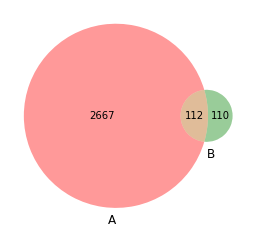

In [6]:
venn2([stat3_cd4_genes, il2_stat5_promoted])

## Stat3 binding genes & Il2-stat5 repressed overlap

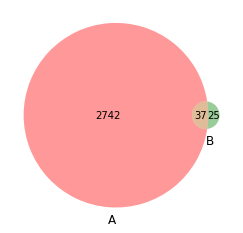

In [7]:
venn2([stat3_cd4_genes, il2_stat5_repressed])

## Stat3 binding genes & Il2-stat5 promoted in Arm overlap

Il2 stat5 promoted & Stat3 binding Overlap:
{'Atp11b', 'F2rl2', 'Il7r', 'Dpy19l3', 'Rgs1', 'Rap1gds1', 'Gng12', 'Eps8', 'Chd7', 'Gzmb', 'Slc4a7', 'Crim1', 'Wwp1', 'Spef2', 'Klf7', 'Znrf2', 'Ccr5', 'Batf3', 'Tgfbr3', 'Atp2b4', 'Diaph1', 'Slco3a1', 'Treml2', 'Slc2a3'}
----------
Il2 stat5 promoted but not Stat3 binding:
{'Dipk2a', 'Nedd4l', 'Tmem108', 'Rhoq', 'Acsl4', 'Rev3l', 'Golim4', 'Lamc1', 'Pde7a', 'Notch2', 'Ankib1', 'Fnip1', 'Emilin2', 'Ctla2a', 'Tle1'}


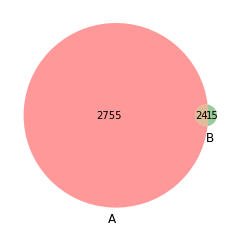

In [11]:
venn2([stat3_cd4_genes, il2_stat5_promoted_a_genes])
print("Il2 stat5 promoted in Arm & Stat3 binding Overlap:")
print(stat3_cd4_genes & il2_stat5_promoted_a_genes)
print("----------")
print("Il2 stat5 promoted in Arm but not Stat3 binding:")
print(il2_stat5_promoted_a_genes - stat3_cd4_genes)

## Stat3 binding genes & Il2-stat5 repressed in Cl13 overlap

Il2 stat5 repressed and highly expressed in Cl13 & Stat3 binding Overlap:
{'Ppp1r16b', 'Ifi213', 'Il6st', 'Gbp4', 'Tnfsf8', 'Ttc39b', 'Tox2', 'Bcl3', 'Ifit3', 'Bcl6', 'Myo1e', 'Gpr18', 'Slamf6', 'Ifit3b', 'Serpinb9', 'Traf1', 'Bcl2l11', 'Slfn2', 'Adora2a', 'Irf9', 'Id3'}
----------
Il2 stat5 repressed and highly expressed in Cl13 but not Stat3 binding:
{'Tnfsf11', 'Pou2f2', 'Mcoln2', 'Gfod1', 'Atg16l2', 'Wars', 'Nrip1', 'Rasgef1b', 'Frmd4a', 'Atp9a'}


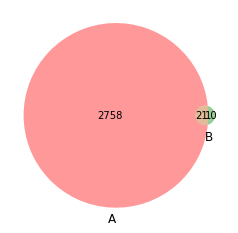

In [12]:
venn2([stat3_cd4_genes, il2_stat5_repressed_c_genes])
print("Il2 stat5 repressed and highly expressed in Cl13 & Stat3 binding Overlap:")
print(stat3_cd4_genes & il2_stat5_repressed_c_genes)
print("----------")
print("Il2 stat5 repressed and highly expressed in Cl13 but not Stat3 binding:")
print(il2_stat5_repressed_c_genes - stat3_cd4_genes)

## Type1 interferon related genes & Il2-stat5 promoted overlap

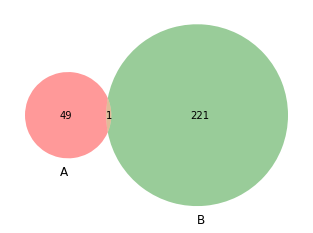

In [14]:
venn2([type1_ifn_genes, il2_stat5_promoted])

## Type1 interferon related genes & Il2-stat5 repressed overlap

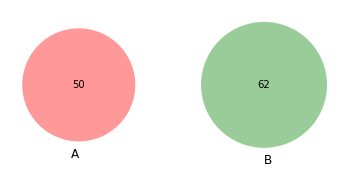

In [15]:
venn2([type1_ifn_genes, il2_stat5_repressed])